

#K-means (Lloyd's algorithm)
K-Means is one the most popular cluster techniques applied in Data Mining. It attempts to divide the $n$ rows of data into $k$ clusters, and is implemented in four steps:

>* Partition objects into k nonempty subsets
>* Compute seed points as the centroids of the clusters of the current partition (the centroid is the center, i.e., mean point, of the cluster)
>* Assign each object to the cluster with the nearest seed point  
>* Go back to Step 2, stop when no more new assignment

Kmeans can be relaively efficent (O(tkn), where t is the number of iterations and k, t << n), but is suspectible to outliers or noisy data, struggles with local optimums when you have large datasets and is only applicable to continous data. The global optimum may be found using techniques such as deterministic annealing and genetic algorithms.

It also requires us to specify $k$ which is not always possible. Finally, the shape of the clusters is very important for kmeans. In reallity it will not do a good job finding clusters of non-convex shapes, and generally it requires that the clusters be of similar size and density.


The following code snipet is modelled on an example from [Towardsdatascience](https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203). However, I have changed the dataset to the scikit learns Iris dataset.


As usual we import the relevant libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

Next we import the Iris data from sklearn.datasets. I have printed out the feature names so I could label the 3-d plot. I have also printed out the correlation matrix and as in previous examples see that petal length and petal width are highly correlated, 96%. Sepal length is also highly correlated with these feature (81.7%).

In [2]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.

y = iris.target
target_names=list(iris.target_names)
print(target_names)
df = pd.DataFrame({'Xsl':X[:,0],'Xsw':X[:,1],'Xpl':X[:,3],'Xpw':X[:,3],'y':y})
print(df)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


['setosa', 'versicolor', 'virginica']
     Xsl  Xsw  Xpl  Xpw  y
0    5.1  3.5  0.2  0.2  0
1    4.9  3.0  0.2  0.2  0
2    4.7  3.2  0.2  0.2  0
3    4.6  3.1  0.2  0.2  0
4    5.0  3.6  0.2  0.2  0
..   ...  ...  ...  ... ..
145  6.7  3.0  2.3  2.3  2
146  6.3  2.5  1.9  1.9  2
147  6.5  3.0  2.0  2.0  2
148  6.2  3.4  2.3  2.3  2
149  5.9  3.0  1.8  1.8  2

[150 rows x 5 columns]


,Xsl,Xsw,Xpl,Xpw,y
Xsl,1.000000,-0.117570,0.817941,0.817941,0.782561
Xsw,-0.117570,1.000000,-0.366126,-0.366126,-0.426658
Xpl,0.817941,-0.366126,1.000000,1.000000,0.956547
Xpw,0.817941,-0.366126,1.000000,1.000000,0.956547
y,0.782561,-0.426658,0.956547,0.956547,1.000000


The next thing we will do is create a plot showing the various flower types and how there sepal length and sepal widths relate to each other.

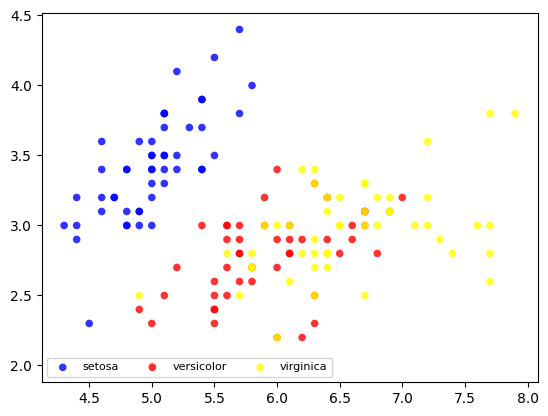

In [3]:
#X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
groups=("1","2","3")
fig, ax = plt.subplots()

setosa=plt.scatter(df.loc[df['y']==0,'Xsl'].values, df.loc[df['y']==0,'Xsw'].values,alpha=0.8, c='blue', edgecolors='none', s=30)
versicolor=plt.scatter(df.loc[df['y']==1,'Xsl'].values, df.loc[df['y']==1,'Xsw'].values,alpha=0.8, c='red', edgecolors='none', s=30)
virginica=plt.scatter(df.loc[df['y']==2,'Xsl'].values, df.loc[df['y']==2,'Xsw'].values,alpha=0.8, c='yellow', edgecolors='none', s=30)

plt.legend((setosa, versicolor, virginica),
           ('setosa', 'versicolor', 'virginica'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)


We can see that setosa is easy to differentiate with these 2 variables, however the other are quite "close" to each other.

The following piece of code is something you should probably do if you are trying to determine the value of k. In our case we know it is 3 but look how the graph below. The "elbow" of the curve tell us the optimum number of clusters is either 3. The point where the curve flattens out. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the intertia_ property (within cluster sum of squares (WCSS)). As the number of clusters increases we expect the WCSS to reduce at a slower rate. The "elbow" really tells us the value of k where the WCSS is not reducing substantially.

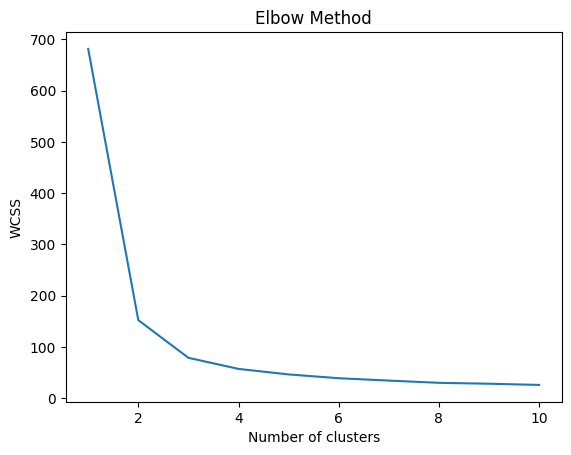

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Now compare the clusters from the actual y values with the Kmeans predicted y values in the 2 graphs below. The cluster numbers will be different. Kmeans is just telling that certain rows belong to specific clusters.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


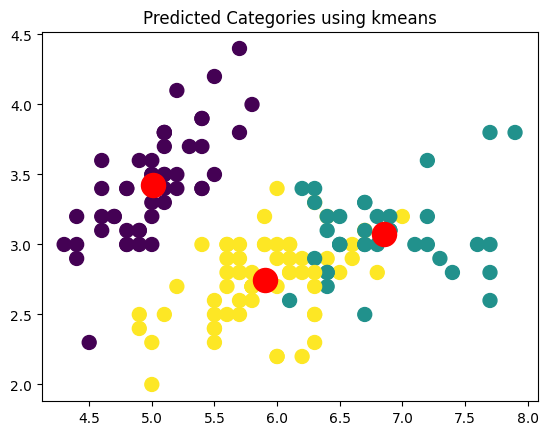

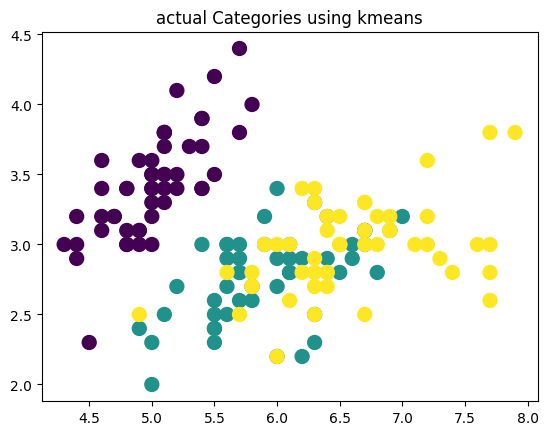

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
print(pred_y)
print(y)
pred_y = np.where(pred_y == 1,3 , pred_y)
pred_y = np.where(pred_y == 2,4 , pred_y)
pred_y = np.where(pred_y == 0,5 , pred_y)
pred_y=pred_y-3
plt.scatter(X[:,0], X[:,1],s=100, c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Predicted Categories using kmeans')
plt.show()
plt.title('actual Categories using kmeans')
plt.scatter(X[:,0], X[:,1],s=100, c=y)
plt.show()

Finally, we have printed out the confusion matrix.
Play with the above code and see if you can get it to work on another dataset. As usual leave your thought on the comments board.

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, pred_y)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]])